In [1]:
%load_ext autoreload
%autoreload 2

# Q1 Training Datasets

Training Datasets (TDS) in EOTDL are categorized into different [quality levels](https://eotdl.com/docs/datasets/quality), which in turn will impact the range of functionality that will be available for each dataset.

In this tutorial you will learn about Q1 datsets, datasets with STAC metadata. 

## Ingesting Q1 datasets

To ingest a Q1 datasets you will need its STAC metadata.

### Datasets with STAC metadata

Some datasets already have STAC metadata, and can be ingested directly into EOTDL. For example, the [AgriFieldNet Competition Dataset
](https://mlhub.earth/data/ref_agrifieldnet_competition_v1) dataset is available on Radiant MLHub. To follow with this tutorial, please download the dataset and extract it in the `data` folder.

In [2]:
import os 

os.listdir('data')

['ref_agrifieldnet_competition_v1']

Optionally, keep only a small number of items for faster testing.

In [3]:
import shutil 
from glob import glob 
import json

def limit_items_in_collection(collection, limit=10):
	shutil.copyfile(collection, collection + "-bck")
	with open(collection, "r") as f:
		data = json.load(f)
	data["links"] = data["links"][:limit]
	with open(collection, "w") as f:
		json.dump(data, f)

collections = glob("data/ref_agrifieldnet_competition_v1/*/collection.json")
for collection in collections:
	limit_items_in_collection(collection)

collections

['data/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_train/collection.json',
 'data/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_test/collection.json',
 'data/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_source/collection.json']

Ingest the dataset passing the path to the root folder that contains the `catalog.json`. This will ingest the metadata as well as all the assets.

In [10]:
from eotdl.datasets import ingest_dataset

df = ingest_dataset('data/ref_agrifieldnet_competition_v1/')


Loading STAC catalog...
Uploading assets...


100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


Ingesting STAC catalog...
Done


After the ingestion, you can download your dataset like any other dataset.

In [11]:
from eotdl.datasets import download_dataset

dst_path = download_dataset('ref_agrifieldnet_competition_v1')
dst_path

To download assets, set assets=True


'/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1'

By default it will only download the STAC metadata. In case you also want to download the actual data, you can use the `assets` parameter. 

In [2]:
from eotdl.datasets import download_dataset

dst_path = download_dataset('ref_agrifieldnet_competition_v1', assets=True)
dst_path

100%|██████████| 20/20 [00:01<00:00, 17.40it/s]


'/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1'

You will find the data in `dst_path/assets`, where a subfolder for each items with its `id` will contain all the assets for that item.

In [19]:
glob(dst_path + '/assets/*/*.pdf')

['/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_labels_train/Documentation.pdf',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_labels_test/Documentation.pdf']

In [20]:
glob(dst_path + '/assets/*/*.tif')[:10]

['/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a_B09_10m.tif',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a_B12_10m.tif',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a_B04_10m.tif',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a_B02_10m.tif',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a_B11_10m.tif',
 '/home/juan/.eotdl/datasets/ref_agrifieldnet_competition_v1/assets/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competitio

Alternatively, you can download an asset using its url.

In [3]:
import json

with open(dst_path + '/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_source/ref_agrifieldnet_competition_v1_source_73e8a/ref_agrifieldnet_competition_v1_source_73e8a.json', 'r') as f:
	data = json.load(f)

url = data['assets']['B01']['href']
url

'http://localhost:8010/datasets/64d21c7a352af6840dc0a864/download/ref_agrifieldnet_competition_v1_source_73e8a_B01_10m.tif'

In [4]:
from eotdl.datasets import download_file_url

download_file_url(url, 'data')

100%|██████████| 6.47k/6.47k [00:00<00:00, 5.86MiB/s]


'data/ref_agrifieldnet_competition_v1_source_73e8a_B01_10m.tif'

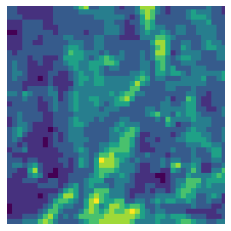

In [13]:
from rasterio.plot import show
import matplotlib.pyplot as plt

ds = rio.open('data/ref_agrifieldnet_competition_v1_source_73e8a_B01_10m.tif')
x = ds.read(1)

plt.imshow(x)
plt.axis('off')
plt.show()

### Creating STAC metadata

The EOTDL library also offers functionality in case that your dataset does not have STAC metadata but you want to ingest it as a Q1 dataset to leverage other EOTDL functionalities. Let's see an example using the EuroSAT dataset. You can download the dataset [here](https://www.eotdl.com/datasets/EuroSAT-RGB). Then, extract it and put it in the `data` folder.

In [1]:
import os 

os.listdir('data')

['ref_agrifieldnet_competition_v1',
 'ref_agrifieldnet_competition_v1_source_73e8a_B01_10m.tif',
 'EuroSAT']

The EuroSAT dataset contains satellite images for classification, i.e. each image has one label associated. In this case, the label can be extracted from the folder structure.

In [2]:
labels = os.listdir('data/EuroSAT/2750')
labels

['Industrial',
 'Forest',
 'HerbaceousVegetation',
 'PermanentCrop',
 'Highway',
 'Residential',
 'SeaLake',
 'River',
 'AnnualCrop',
 'Pasture']

In [3]:
from eotdl.curation.stac.parsers import UnestructuredParser
from eotdl.curation.stac.stac import STACGenerator

stac_generator = STACGenerator(image_format='jpg', item_parser=UnestructuredParser)

df = stac_generator.get_stac_dataframe('data/EuroSAT/2750')
df.head()


TypeError: 'type' object is not subscriptable